# Predicting Device Failure

### Importing libraries and dataset

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('failure.csv')

### Exploratory Data Analysis

In [6]:
df.shape

(124494, 12)

In [8]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [9]:
df.sample(7)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
17350,2015-01-21,S1F0S65X,0,68690536,0,0,0,8,270168,0,0,0
80083,2015-05-10,W1F1CKKW,0,26467176,0,0,0,19,338846,0,0,1
10615,2015-01-11,Z1F0MTFT,0,62698056,0,0,0,12,259050,0,0,0
9614,2015-01-10,W1F0VDH2,0,162860880,0,0,0,36,258658,0,0,0
65385,2015-04-03,S1F0LBY2,0,111019472,0,0,0,12,477234,0,0,0
123603,2015-10-16,S1F130JB,0,196928640,0,0,0,9,255230,0,0,0
66823,2015-04-06,S1F0GPXY,0,49096688,0,0,0,9,244211,0,0,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [10]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [4]:
df.duplicated().sum() #tekrar eden aynı veri var mı kontrol ediyoruz

0

In [5]:
df.isnull().sum() #boş veri var mı kontrol ediyoruz

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

## Feature Engineering

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['month'] = df['date'].dt.month

In [13]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1


In [14]:
del df["date"]

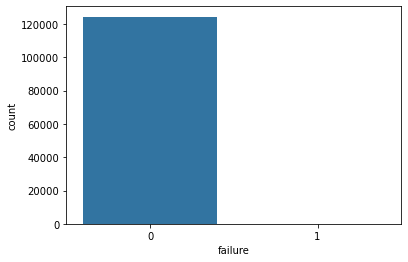

In [16]:
sns.countplot(df['failure']);

In [17]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [18]:
df.nunique()

device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
month             11
dtype: int64

In [19]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,0.000321
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,-0.005613
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,-0.006416
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,-0.001101
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,-0.005490
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,-0.014129
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,0.138159
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.020576
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.020576
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,-0.025383


In [20]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,month
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,4.028299
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,2.572167
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,6.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,11.000000


In [21]:
df.corr()['failure'].sort_values(ascending=False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6   -0.000550
attribute3   -0.000948
Name: failure, dtype: float64

In [22]:
del df['attribute8']

In [23]:
df["device model"] = df.device.str[:4]

In [26]:
df["device model"].tail()

124489    Z1F0
124490    Z1F0
124491    Z1F0
124492    Z1F0
124493    Z1F0
Name: device model, dtype: object

In [27]:
del df["device"]

In [28]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
from sklearn.utils import resample

In [31]:
f0 = df[df.failure == 0]
f1 = df[df.failure == 1]

In [32]:
resampled = resample(f0, replace=True, n_samples=106, random_state=13)

In [33]:
ds = pd.concat([f1, resampled])

In [34]:
ds.failure.value_counts()

1    106
0    106
Name: failure, dtype: int64

In [35]:
x = ds.drop("failure",axis=1)
y = ds["failure"]

In [36]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
x = slr.fit_transform(x)

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
test = SelectKBest(score_func=f_classif, k=6)
fs = test.fit(x, y)
print(fs.scores_)
tX = fs.transform(x)

[ 0.032987   10.90283965  0.85177767  7.36145129  1.5891799   0.28222319
  7.11234822  1.70354718  0.09619971  6.92307692  0.96477795  1.2
  0.0449294   0.26819923         nan]


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(tX,y,test_size = 0.20,random_state = 13)

In [49]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
r.fit(x_train, y_train)
prediction = r.predict(x_test)

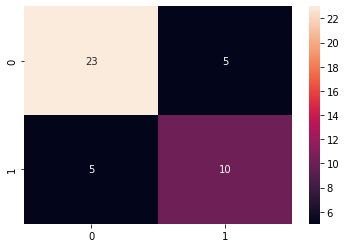

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [50]:
accuracy_score(y_test,prediction),recall_score(y_test,prediction),f1_score(y_test,prediction),precision_score(y_test,prediction)

(0.7674418604651163,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666)